In [3]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline
py.init_notebook_mode(connected=True)

In [4]:
df = pd.read_csv('/home/yanina/Documents/coursera/Python4DataScience/vis/fifa-18-demo-player-dataset/CompleteDataset.csv', low_memory=False)
df.Wage = df.Wage.apply(lambda x: float(x[1:-1]) * 1000 if x[1:-1] else 0.0)
df.Value = df.Value.apply(lambda x: float(x[1:-1]) * 1000000 if x[1:-1] else 0.0)
df.Age = df.Age.apply(lambda x: int(x))
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Количество')

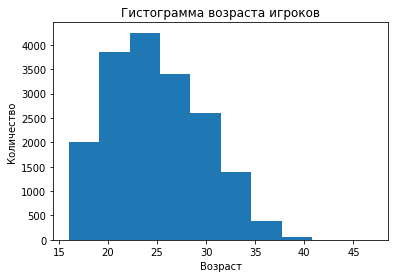

In [5]:
"""Гистограмма возраста игроков
Показывает самый лучший возраст, чтобы стать миллиардером
"""
ax = df.Age.plot.hist()
ax.set_title('Гистограмма возраста игроков')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество')

Text(0, 0.5, 'Зарплата')

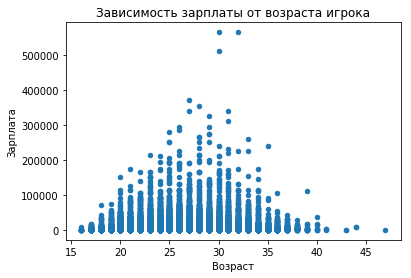

In [6]:
"""Сравнение зависимости зарплаты от возраста игрока
Показывает какого возраста самые богатые бесполезные для общества люди на земле
"""
ax = df.plot.scatter(x='Age', y='Wage')
ax.set_title('Зависимость зарплаты от возраста игрока')
ax.set_xlabel('Возраст')
ax.set_ylabel('Зарплата')

In [7]:
"""Зависимость зарплаты игрока от его возраста по 2м самым большим командам
Показывает в какой зависимости от возраста 2 самые большие команды платят своим игрокам
"""
clubs = df.groupby('Club').size().reset_index(name='counts').sort_values('counts', ascending=False).reset_index()
first_club = df[df.Club == clubs.iloc[0].Club]
second_club = df[df.Club == clubs.iloc[1].Club]
trace1 = go.Scatter(
    x=first_club.Age, 
    y=first_club.Wage, 
    name = clubs.iloc[0].Club, 
    mode='markers',
    text=first_club.Name
)
trace2 = go.Scatter(
    x=second_club.Age, 
    y=second_club.Wage, 
    name = clubs.iloc[1].Club, 
    mode='markers',
    text=second_club.Name
)
data = [trace1, trace2]
layout = go.Layout(
    title='Зависимость зарплаты игрока от его возраста',
    xaxis={
        'title': 'Возраст игрока'
    },
    yaxis={
        'title': 'Зарплата игрока'
    }
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [8]:
"""Зависимость средней зарплаты игрока от страны
Показывает, какие страны готовы тратить огромные деньги для отвлечения внимания своих граждан
от внутренних проблем
"""
countries = df.groupby(['Nationality']).agg({'Wage': 'mean'}).sort_values('Wage', ascending=False)
trace = go.Bar(
    x=countries.Wage.keys(), 
    y=countries.Wage
)
data = [trace]
layout = go.Layout(
    title='Зависимость средней зарплаты игрока от страны',
    xaxis={
        'title': 'Страна'
    },
    yaxis={
        'title': 'Средняя зарплата'
    }
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Text(0, 0.5, 'Количество')

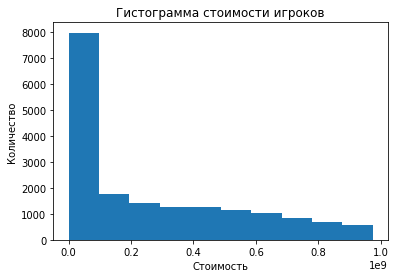

In [9]:
"""Гистограмма стоимости игроков
Показывает распределение стоимости игроков по всему земному шару
"""
ax = df.Value.plot.hist()
ax.set_title('Гистограмма стоимости игроков')
ax.set_xlabel('Стоимость')
ax.set_ylabel('Количество')

In [10]:
"""Зависимость средней стоимости игрока от страны
Показывает, игроки каких стран больше всего ценятся на футбольном рынке
"""
countries = df.groupby(['Nationality']).agg({'Value': 'mean'}).sort_values('Value', ascending=False)
trace = go.Bar(
    x=countries.Value.keys(), 
    y=countries.Value
)
data = [trace]
layout = go.Layout(
    title='Зависимость средней стоимости игрока от страны',
    xaxis={
        'title': 'Страна'
    },
    yaxis={
        'title': 'Средняя стоимость'
    }
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)